# Introduction and Background

Employee retention and compensation are critical topics in human resource management, as they directly impact organizational performance and long-term sustainability. High employee turnover can result in significant financial costs, reduced productivity, and loss of organizational knowledge, while effective salary structures are essential for attracting and motivating talent. In recent years, the increasing availability of workforce data has enabled organizations to adopt data-driven approaches for understanding attrition patterns and optimizing compensation strategies.

This project leverages a comprehensive HR dataset containing demographic, job satisfaction, compensation, and career progression information for 1,470 employees. The primary objectives are twofold:
(1) to identify the key factors associated with voluntary employee attrition, and
(2) to model and predict monthly income based on various individual and job-related features.

Through exploratory data analysis, visualization, and machine learning techniques, the project aims to uncover actionable insights that can inform retention strategies and fair compensation policies. By combining descriptive analytics with predictive modeling, this analysis demonstrates the practical value of data science in addressing common HR challenges.

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score,  f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 📋 Data Exploration, Preparation and EDA Steps
1. Basic Dataset Overview
I begin by importing the dataset and examining its basic structure.

2. Missing Values
Next, I assess data quality by identifying any missing values or blank entries. If necessary, I visualize missingness (e.g., with a heatmap) to identify patterns or problematic features.

3. Descriptive Statistics
I compute summary statistics for numerical features using .describe() and review the distribution of categorical variables (e.g., via value counts for Gender, Department, and Attrition). This helps us understand the data’s central tendencies and variability.

4. Target Variable Exploration
Since the main modeling goal is attrition prediction, I check the balance of the Attrition variable (i.e., the proportion of employees who left vs. stayed), using a bar plots.

5. Data Visualizations
To better understand distributions and relationships, I visualize key variables:

6. Key Insights
Finally, we document any notable trends or anomalies observed during EDA, such as “Employees in certain job roles have higher attrition rates,” which will guide further modeling and feature engineering.



In [2]:
# Import the cleaned employee dataset
data = pd.read_excel("/kaggle/input/hr-analytics-dashboard-employee-attrition/Cleaned_Employee_Data.xlsx")

In [3]:
# Check dataset shape and list of columns
len(data), len(data.columns),data.columns

(1470,
 35,
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'))

The dataset contains 1,470 rows and 35 columns with detailed employee information.

In [4]:
# Display all column names and the first few records
pd.set_option('display.max_columns', None) 

data.head()

# Previewing the data structure and sample records to understand available features.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Identify columns that are not numeric (categorical/object types)
data.dtypes
#Reviewing data types helps distinguish between numerical, ordinal, and categorical variables.

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Check unique values in each categorical column to detect possible typos or unexpected categories
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")
   
# Ensuring all categorical features have valid and expected values.

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [7]:
# Ensuring all features have valid and expected values.
data.isnull().sum().sum(), (data == '').sum().sum()

# Confirming the dataset is complete and free from missing or blank values.

(0, 0)

In [8]:
# Review summary statistics for numerical columns (excluding categoricals)

data[[
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "HourlyRate",
    "MonthlyIncome",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]].describe()

# Assessing ranges and distributions to ensure plausible values for age, salary, tenure, etc.


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Check: ensure no logical inconsistencies (e.g. YearsWithCurrManager > Age, etc.)
# Age >= TotalWorkingYears >= YearsAtCompany >= YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion


def check_logical_inconsistencies(df, col1, col2):
    """
    Check that col1 >= col2 (or Age - 17 >= col2).
    """
    if col1 == "Age":
        assert ((df[col1] - 17) >= df[col2]).all(), f"{col2} is greater than {col1}!"
    else:
        assert (df[col1] >= df[col2]).all(), f"{col2} is greater than {col1}!"


comb_of_cols = [
    ["Age", "TotalWorkingYears"],
    ["TotalWorkingYears", "YearsAtCompany"],
    ["YearsAtCompany", "YearsInCurrentRole"],
    ["YearsAtCompany", "YearsWithCurrManager"],
    ["YearsAtCompany", "YearsSinceLastPromotion"]               ]

for comb in comb_of_cols:
    check_logical_inconsistencies(data, comb[0], comb[1])

All career progression columns follow logical orderings.


In [10]:
# Check: categorical/ordinal columns for valid expected codes
for col in data[[
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance"
]]:
    print(data[col].unique())

# Confirming that ordinal variables use only valid, expected codes (e.g. 1–4).

[2 1 4 3 5]
[2 3 4 1]
[3 2 4 1]
[2 1 3 4 5]
[4 2 3 1]
[3 4]
[1 4 2 3]
[0 1 3 2]
[1 3 2 4]


In [11]:
# Reset pandas display options to defaults for further analysis
pd.reset_option('all')

/tmp/ipykernel_35/2357469031.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/tmp/ipykernel_35/2357469031.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [12]:
# Prepare for Exploratory Visualization 


# Columns with only one constant value (skip these)
constant_cols = ["EmployeeCount", "StandardHours", "Over18"]

irelevant_cols= ["EmployeeNumber"]

# Numeric but ordinal/categorical
numeric_categorical = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "WorkLifeBalance"
]

# Categorical (strings)
string_categorical = [
    "Attrition", "BusinessTravel", "Department", "EducationField",
    "Gender", "JobRole", "MaritalStatus", "OverTime"
]

# All columns (excluding constants and irrelevant columns)
cols_to_plot = [
    "Age", "Attrition", "BusinessTravel", "DailyRate", "Department",
    "DistanceFromHome", "Education", "EducationField",
    "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement",
    "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome",
    "MonthlyRate", "NumCompaniesWorked", "OverTime",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
    "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]


**Exploratory Data Visualization**
To gain an initial overview of the distributions and prevalence of each variable, I visualize all relevant features, excluding columns that are constant or serve only as unique identifiers. For categorical and ordinal columns, bar plots are used to display value counts. For continuous variables, histograms are used to visualize distributions. This provides a quick sense of class balance, potential outliers, and variable ranges before drilling down into model-specific features.



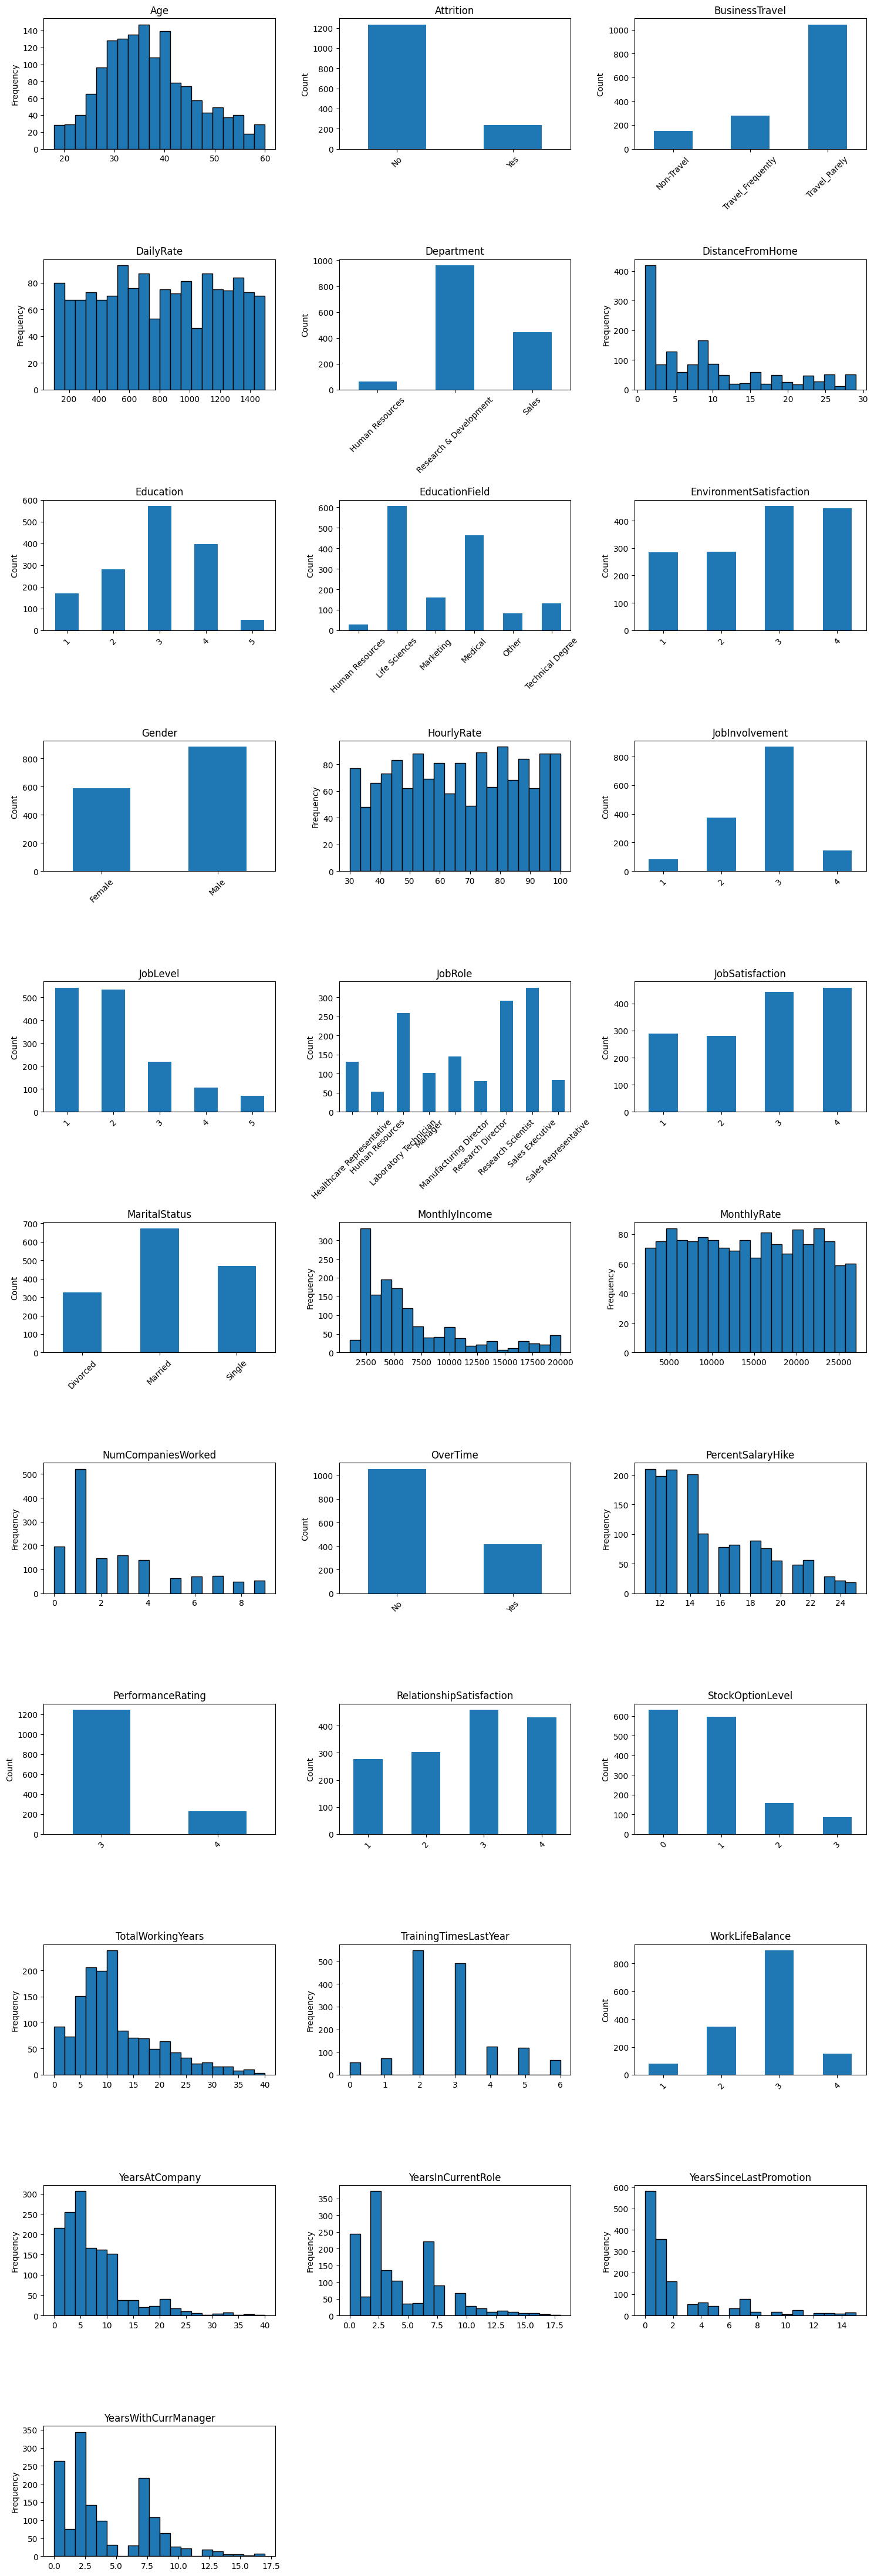

In [13]:
# Remove constant and irrelevant columns from visualization
cols_to_plot = [col for col in cols_to_plot if col not in constant_cols and col not in irelevant_cols]

# Set up figure grid for comprehensive plotting
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    ax.set_title(f"{col}")

    if col in string_categorical or col in numeric_categorical:
        data[col].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)  

    else:
        data[col].plot(kind='hist', bins=20, edgecolor='black', ax=ax)
        ax.set_xlabel("")
        ax.set_ylabel("Frequency")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

These initial plots help confirm variable distributions, spot rare classes, and reveal data entry artifacts (such as unanticipated codes or extreme values). This broad overview sets the stage for more targeted visualizations, focusing on variables most relevant for attrition and salary prediction modeling.

## 📉 Visualizations part 1 (for the Attrition)
Having reviewed the distributions and class balance of all variables, I now focus on visualizations tailored to each modeling objective. For attrition prediction and salary regression, I select the most informative features for deeper exploration.



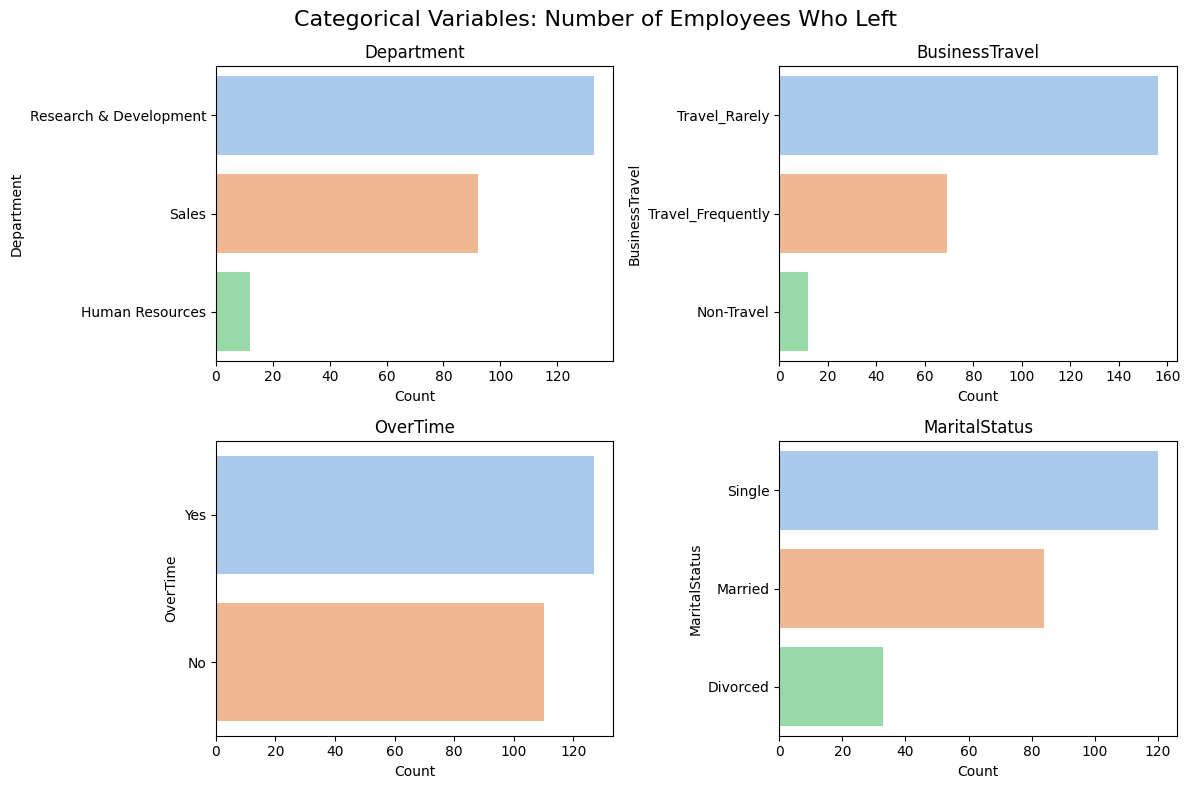

In [14]:
# Visualize categorical features among employees who left ("Attrition" == "Yes")
# Purpose: Identify which groups (departments, travel frequency, overtime status, marital status) have the most leavers.

df = data.copy()


# Make sure Attrition is filtered to 'Yes'
attrition_yes = df[df['Attrition'] == 'Yes']

# Pick your categorical columns
cat_cols = ['Department', 'BusinessTravel', 'OverTime', 'MaritalStatus']

# Setup 2×2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(
        y=col,   # horizontal bar
        data=attrition_yes,
        order=attrition_yes[col].value_counts().index,
        palette='pastel',
        ax=ax
    )
    ax.set_title(f'{col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

fig.suptitle('Categorical Variables: Number of Employees Who Left', fontsize=16)
plt.tight_layout()
plt.show()

# Commentary:
# These plots help reveal which departments, travel patterns, overtime statuses, and marital statuses are overrepresented among employees who left.
# This provides insight into potential risk factors for attrition in the organization.

Certain departments and groups (e.g., employees with frequent travel or those who work overtime) show higher counts among those who left, suggesting possible links between job context and attrition.



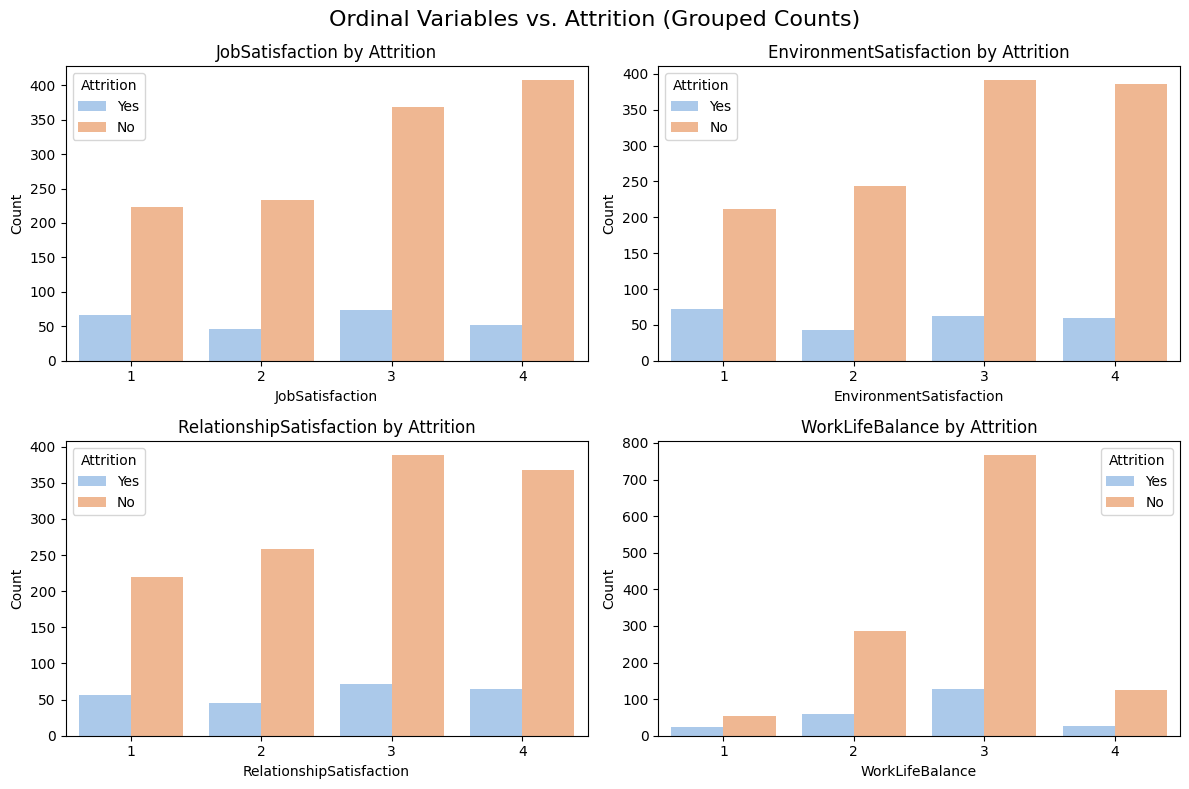

In [15]:
# Your ordinal variables
ord_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# 2×2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(ord_cols):
    ax = axes[i]
    sns.countplot(
        x=col,
        hue='Attrition',
        data=df,
        order=sorted(df[col].unique()),
        palette='pastel',
        ax=ax
    )
    ax.set_title(f'{col} by Attrition')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Attrition')
    ax.tick_params(axis='x', rotation=0)

fig.suptitle('Ordinal Variables vs. Attrition (Grouped Counts)', fontsize=16)
plt.tight_layout()
plt.show()

# Commentary:
# These grouped bar plots show how satisfaction and work–life balance scores are distributed among leavers and stayers.
# Patterns here may reveal if dissatisfied employees are more likely to leave.

Employees with lower satisfaction or work–life balance scores are more likely to be among those who left, highlighting the importance of these factors in retention.



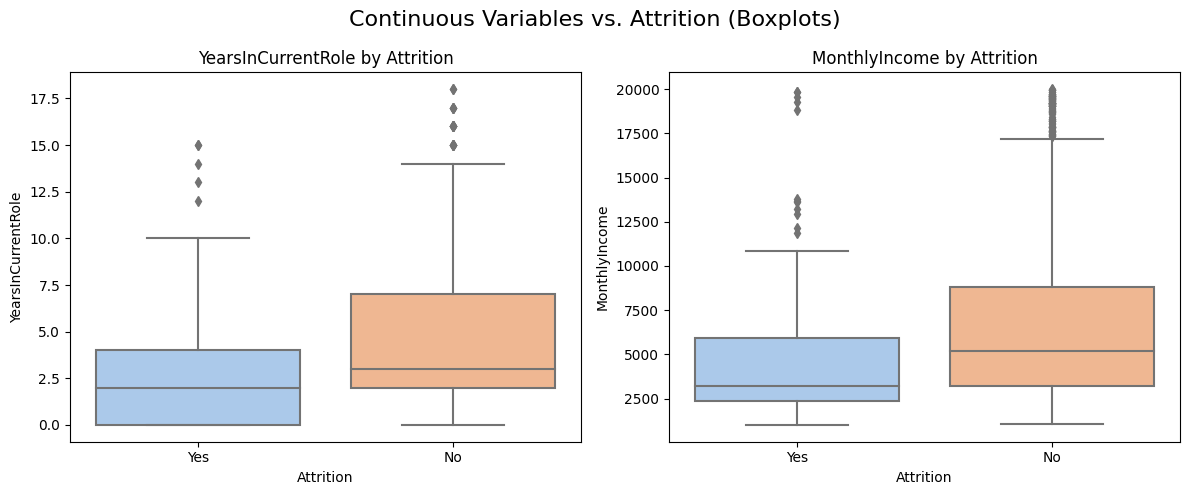

In [16]:
# Continuous columns you want to plot
cont_cols = ['YearsInCurrentRole', 'MonthlyIncome']

# Setup 1×2 figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(cont_cols):
    ax = axes[i]
    sns.boxplot(
        x='Attrition',
        y=col,
        data=df,
        palette='pastel',
        ax=ax
    )
    ax.set_title(f'{col} by Attrition')
    ax.set_xlabel('Attrition')
    ax.set_ylabel(col)

fig.suptitle('Continuous Variables vs. Attrition (Boxplots)', fontsize=16)
plt.tight_layout()
plt.show()

# Commentary:
# Boxplots allow for easy comparison of medians and ranges for salary and tenure between employees who stayed and those who left.
# Outliers, skewness, and distribution shifts are visible at a glance.


**Observation:** Employees who left generally have lower tenure in their current role and tend to have slightly lower median monthly incomes, which may indicate patterns worth further exploration in modeling.



## 📉 Visualizations part 2 (for the Attrition)
The above visualizations highlight the most relevant variables for predicting employee attrition, forming the basis for feature selection in the modeling stage.
In the following section, I apply a similar data exploration process to understand the drivers of monthly income across different groups.



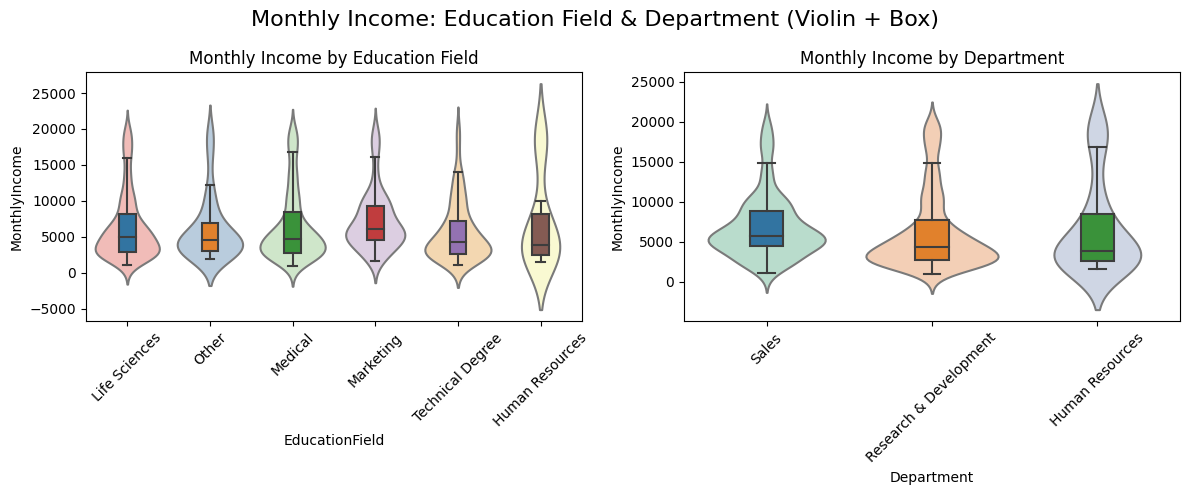

In [17]:
# Visualize distribution and central tendency of Monthly Income across Education Fields and Departments.
# Violin plots show the full distribution (density), while boxplots highlight the median and interquartile range.

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.violinplot(
    x='EducationField',
    y='MonthlyIncome',
    data=df,
    inner=None,       # No inner box, keep it clean
    palette='Pastel1'
)
sns.boxplot(
    x='EducationField',
    y='MonthlyIncome',
    data=df,
    width=0.2,        # Narrower boxplot on top
    boxprops={'zorder': 2},
    showfliers=False  # Optional: hide outliers for clarity
)
plt.title('Monthly Income by Education Field')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(
    x='Department',
    y='MonthlyIncome',
    data=df,
    inner=None,
    palette='Pastel2'
)
sns.boxplot(
    x='Department',
    y='MonthlyIncome',
    data=df,
    width=0.2,
    boxprops={'zorder': 2},
    showfliers=False
)
plt.title('Monthly Income by Department')
plt.xticks(rotation=45)

plt.suptitle('Monthly Income: Education Field & Department (Violin + Box)', fontsize=16)
plt.tight_layout()
plt.show()

# Commentary:
# These plots provide an overview of how Monthly Income varies by both education background and organizational department.
# Outliers, differences in median salary, and the shape of each group's income distribution become visually apparent.

**Observation:** There are notable differences in salary distribution and medians across Education Fields and Departments, with some groups exhibiting wider salary ranges or higher medians than others. This suggests education background and department are important drivers of salary.



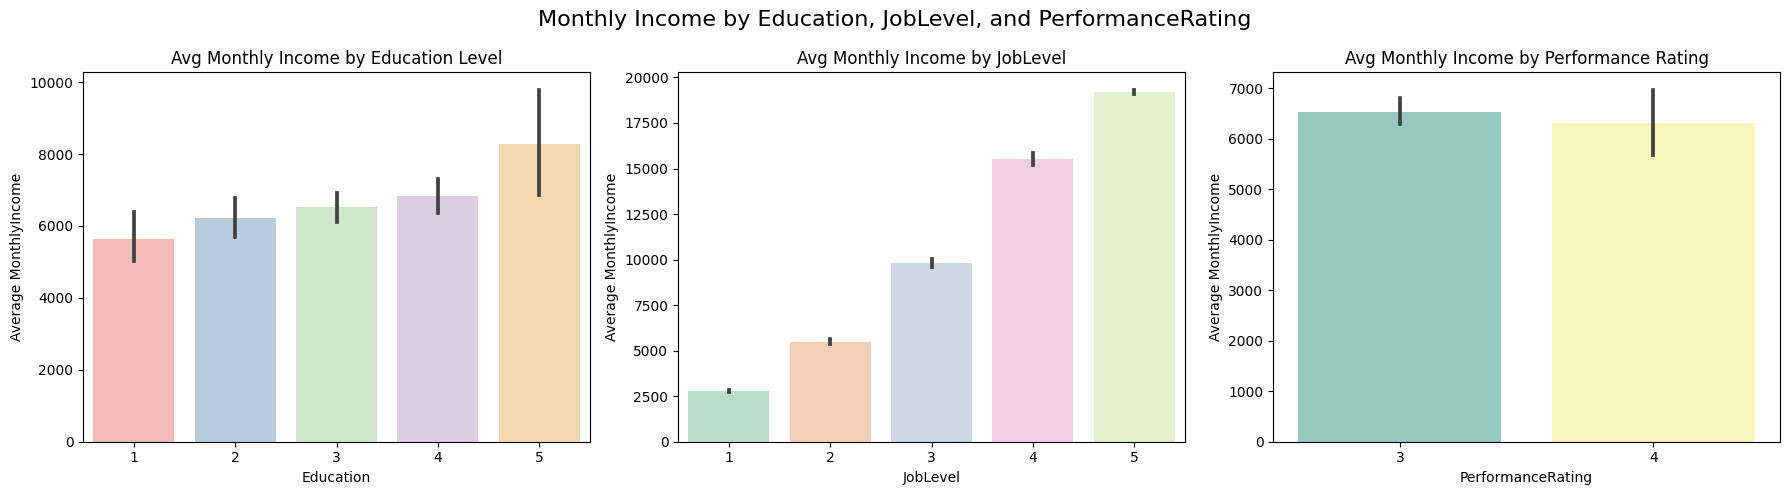

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Education
sns.barplot(x='Education', y='MonthlyIncome', data=df, estimator='mean', ax=axes[0], palette='Pastel1')
axes[0].set_title('Avg Monthly Income by Education Level')
axes[0].set_ylabel('Average MonthlyIncome')
axes[0].set_xlabel('Education')

# 2. JobLevel
sns.barplot(x='JobLevel', y='MonthlyIncome', data=df, estimator='mean', ax=axes[1], palette='Pastel2')
axes[1].set_title('Avg Monthly Income by JobLevel')
axes[1].set_ylabel('Average MonthlyIncome')
axes[1].set_xlabel('JobLevel')

# 3. PerformanceRating
sns.barplot(x='PerformanceRating', y='MonthlyIncome', data=df, estimator='mean', ax=axes[2], palette='Set3')
axes[2].set_title('Avg Monthly Income by Performance Rating')
axes[2].set_ylabel('Average MonthlyIncome')
axes[2].set_xlabel('PerformanceRating')

plt.suptitle('Monthly Income by Education, JobLevel, and PerformanceRating', fontsize=16)
plt.tight_layout()
plt.show()

# Commentary:
# These bar plots show how average salary increases with higher Education and JobLevel.
# PerformanceRating appears less influential, with only minor differences in mean salary between groups.

**Observation:** Salary tends to increase with higher education levels and job levels, consistent with career progression and qualification. Performance rating does not appear to have a strong effect on average salary in this dataset.



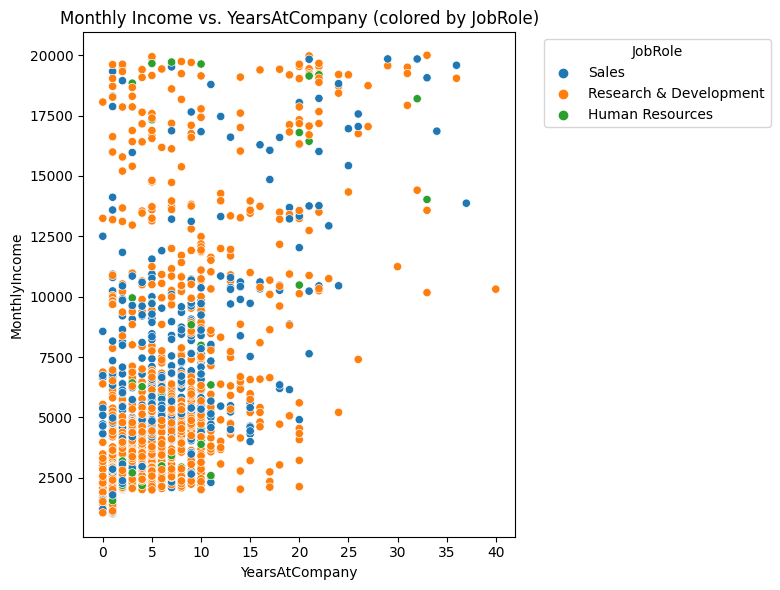

In [19]:
# Scatter plot of Monthly Income vs. YearsAtCompany, colored by Department

plt.figure(figsize=(8, 6))

sns.scatterplot(
    x='YearsAtCompany',
    y='MonthlyIncome',
    hue='Department',
    data=df,
    palette='tab10'
)

plt.title('Monthly Income vs. YearsAtCompany (colored by JobRole)')
plt.xlabel('YearsAtCompany')
plt.ylabel('MonthlyIncome')
plt.legend(title='JobRole', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Commentary:
# Scatterplots show the relationship between tenure at the company and salary, with department as color.
# This can reveal whether certain departments offer faster salary progression or wider ranges at each experience level.

Salaries tend to increase with company tenure, though the relationship is not strictly linear. Certain departments may have higher salary bands or more variability among experienced employees.

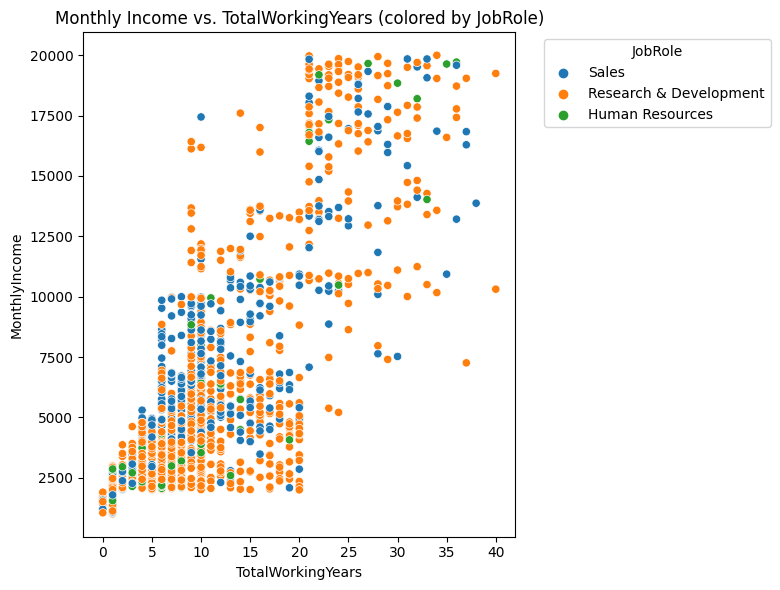

In [20]:
# Scatter plot of Monthly Income vs. TotalWorkingYears, colored by Department

plt.figure(figsize=(8, 6))

sns.scatterplot(
    x='TotalWorkingYears',
    y='MonthlyIncome',
    hue='Department',
    data=df,
    palette='tab10'
)

plt.title('Monthly Income vs. TotalWorkingYears (colored by JobRole)')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.legend(title='JobRole', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Commentary:
# This plot reveals how cumulative work experience relates to salary across departments.
# Look for trends, plateaus, or clusters indicating typical salary progressions or department-specific effects.

**Observation:** There is a strong upward trend between total working years and salary, with some saturation at higher experience levels. Department-based clusters are visible, suggesting differing pay structures or promotion opportunities.



# 📊 Data Preprocessing: Handling Categorical Variables

To use machine learning models, all features must be **numeric**.  
Below, we encode categorical variables using the appropriate techniques:

- **One-hot encoding** for nominal (unordered) categories.
- **Ordinal encoding** for variables with a true order (already integers in our dataset).
- **Binary encoding** for yes/no or male/female variables.


In [21]:
constant_cols+irelevant_cols

['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']

In [22]:
# One-hot for nominal variables
remove_list = ['Attrition', 'OverTime', 'Gender']
cols = [x for x in string_categorical if x not in remove_list]
df_encoded = pd.get_dummies(df, columns=cols, drop_first=True)
# Binary label encoding
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded['OverTime'] = df_encoded['OverTime'].map({'Yes': 1, 'No': 0})
df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1})

# Ordinal - already numeric (e.g., Education, JobSatisfaction, etc.)
# No further action needed if values are already integers

# ---- Drop irrelevant or constant columns ----
# For example, EmployeeNumber (unique ID), EmployeeCount (always 1), StandardHours (always 80)

df_encoded.drop(columns=constant_cols+irelevant_cols, inplace=True)


All categorical features have been converted to numeric format.  
The data is now ready for scaling (if needed) and machine learning!


# 🚀 Model Comparison Results

Below are the cross-validation performance summaries for the models trained on our HR dataset.


In [23]:
# Assume X, y already defined
y = df['Attrition']  # binary, 1=Yes, 0=No
y = y.map({'No': 0, 'Yes': 1})

X = df_encoded.drop('Attrition', axis=1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = {
    'Fisher LDA': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
}
scoring = {
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'accuracy': make_scorer(accuracy_score)
}
results = {}

for name, model in models.items():
    print(f"\n{name}")
    scores = {}
    for metric in scoring:
        cv_scores = cross_val_score(
            model, X, y,
            cv=skf,
            scoring=scoring[metric]
        )
        print(f"{metric}: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        scores[metric] = (cv_scores.mean(), cv_scores.std())
    results[name] = scores
    
# Optional: make a summary DataFrame
summary = pd.DataFrame(
    {k: {m: f"{v[0]:.3f} ± {v[1]:.3f}" for m, v in res.items()}
     for k, res in results.items()}
).T

print("\nCV Performance Summary:")
print(summary)



Fisher LDA
f1: 0.534 ± 0.060
roc_auc: 0.828 ± 0.024
accuracy: 0.879 ± 0.016

Logistic Regression
f1: 0.482 ± 0.017
roc_auc: 0.823 ± 0.023
accuracy: 0.753 ± 0.014

Random Forest
f1: 0.198 ± 0.052
roc_auc: 0.799 ± 0.024
accuracy: 0.854 ± 0.004

CV Performance Summary:
                                f1        roc_auc       accuracy
Fisher LDA           0.534 ± 0.060  0.828 ± 0.024  0.879 ± 0.016
Logistic Regression  0.482 ± 0.017  0.823 ± 0.023  0.753 ± 0.014
Random Forest        0.198 ± 0.052  0.799 ± 0.024  0.854 ± 0.004


## 1️⃣ Attrition Prediction (Binary Classification)

We compared three algorithms:
- **Fisher Linear Discriminant Analysis (LDA)**
- **Logistic Regression**
- **Random Forest Classifier**

All models were evaluated using 5-fold stratified cross-validation. We focused on F1-score (to account for class imbalance), ROC-AUC (to measure discriminative power), and accuracy (for general performance).

| Model               | F1-score        | ROC-AUC         | Accuracy       |
|---------------------|-----------------|-----------------|---------------|
| **Fisher LDA**      | 0.53 ± 0.06     | 0.83 ± 0.02     | 0.88 ± 0.02   |
| Logistic Regression | 0.48 ± 0.02     | 0.82 ± 0.02     | 0.75 ± 0.01   |
| Random Forest       | 0.20 ± 0.05     | 0.80 ± 0.02     | 0.85 ± 0.00   |

### 📝 **Results Commentary**

- 🥇 **Fisher LDA** achieved the **best balance** of F1, ROC-AUC, and accuracy. Its higher F1-score indicates it is more effective at identifying employees who left, despite class imbalance.
- ⚖️ **Logistic Regression** performed slightly worse in F1 and accuracy but was close in ROC-AUC.
- 🌲 **Random Forest** had the **lowest F1-score** despite strong accuracy, showing it struggles with the minority (Attrition = Yes) class—likely due to the dataset size and class imbalance.
- **ROC-AUC** scores indicate that all models have good ability to rank positive vs. negative cases, but actual identification of leavers (F1) is harder.



In [24]:
# X, y setup (already preprocessed)
y = df_encoded['MonthlyIncome']
X = df_encoded.drop('MonthlyIncome', axis=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
    # "XGBoost": XGBRegressor()  # If you want to add, need to pip install xgboost
}

metrics = {
    "MAE": make_scorer(mean_absolute_error),
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "R2": make_scorer(r2_score)
}

results = {}

for name, model in models.items():
    print(f"\n{name}")
    scores = {}
    for metric, scorer in metrics.items():
        cv_scores = cross_val_score(
            model, X, y,
            cv=kf,
            scoring=scorer
        )
        print(f"{metric}: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
        scores[metric] = (cv_scores.mean(), cv_scores.std())
    results[name] = scores

# Optional: summary DataFrame
summary = pd.DataFrame(
    {k: {m: f"{v[0]:.2f} ± {v[1]:.2f}" for m, v in res.items()}
     for k, res in results.items()}
).T

print("\nCV Performance Summary:")
print(summary)



Linear Regression
MAE: 871.84 ± 25.34
RMSE: 1140.63 ± 28.56
R2: 0.94 ± 0.01

Random Forest
MAE: 786.15 ± 41.42
RMSE: 1039.31 ± 56.60
R2: 0.95 ± 0.01

CV Performance Summary:
                              MAE             RMSE           R2
Linear Regression  871.84 ± 25.34  1140.63 ± 28.56  0.94 ± 0.01
Random Forest      786.15 ± 41.42  1039.31 ± 56.60  0.95 ± 0.01


## 2️⃣ Salary Prediction (Regression: MonthlyIncome)

We compared:
- **Linear Regression** (baseline)
- **Random Forest Regressor** (tree-based)

Models were scored using 5-fold cross-validation on MAE (mean absolute error), RMSE (root mean squared error), and R² (explained variance).

| Model               | MAE (±)         | RMSE (±)        | R² (±)        |
|---------------------|-----------------|-----------------|--------------|
| Linear Regression   | 872 ± 25        | 1141 ± 29       | 0.94 ± 0.01  |
| Random Forest       | 786 ± 41        | 1039 ± 57       | 0.95 ± 0.01  |

### 📝 **Results Commentary**

- 🌲 **Random Forest** regressor outperformed linear regression across all metrics, achieving **lower error** and **slightly higher R²**.  
- 🔬 **Linear Regression** also performed very well, with only a modest difference—indicating much of salary variance can be explained linearly, but tree-based models capture additional non-linear patterns.
- Both models explain over **94% of salary variance**, and errors are reasonable in the context of salary ranges.


# ✅ **Summary**

- For **attrition prediction**, simple linear models (especially Fisher LDA) can outperform tree-based models on small, imbalanced datasets.
- For **salary prediction**, Random Forest provides a measurable boost in predictive accuracy, but Linear Regression is already strong—highlighting that your features are highly informative.
